In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r"/Users/bhavishyasrivastava/Downloads/Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [10]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate'] = df['rate'].apply(handleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Type of Resturant

Text(0.5, 0, 'type of resturant')

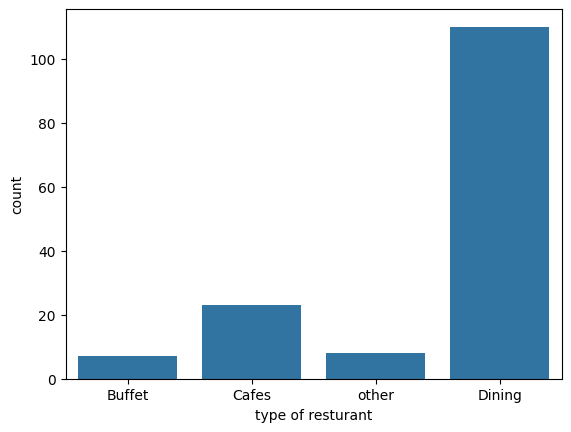

In [11]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of resturant")

Conclusion: Majority of resturant fall in dinning category

Text(0, 0.5, 'votes')

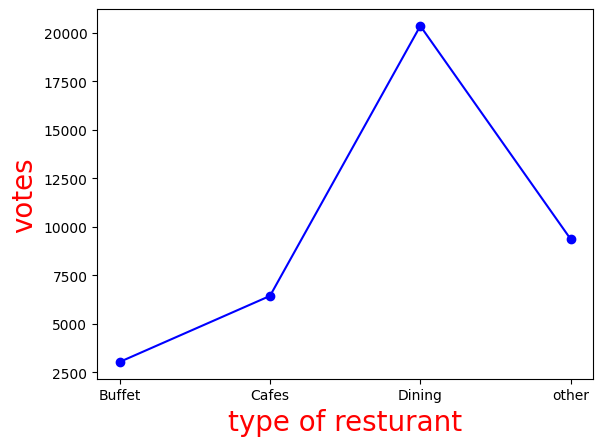

In [13]:
group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': group_data})
plt.plot(result, c='blue', marker='o')
plt.xlabel('type of resturant', c='red', size = 20)
plt.ylabel('votes', c='red', size = 20)

Conlusion: Dinning resturant have highest votes

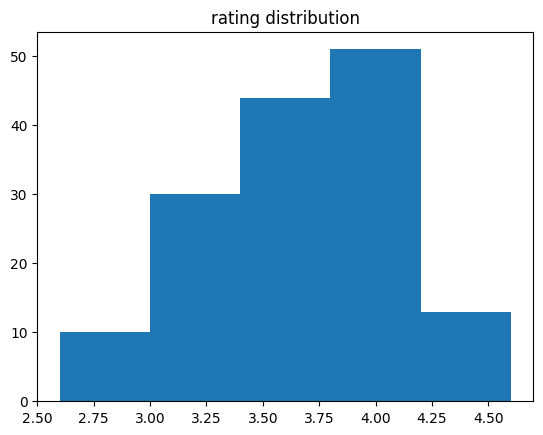

In [15]:
plt.hist(df['rate'], bins=5)
plt.title('rating distribution')
plt.show()

Conclusion: Majority resturant received rating between 3.5 to 4

Average order spending by the couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

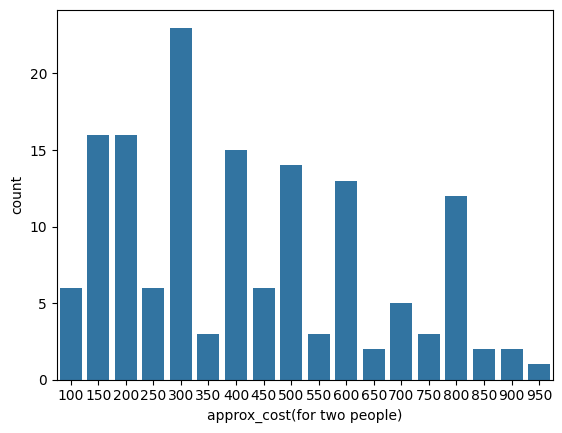

In [16]:
couple_data = df['approx_cost(for two people)'] 
sns.countplot(x=couple_data)

Conclusion: Maximum spending by a couple is Rs. 300

Which mode receive maxing rating

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

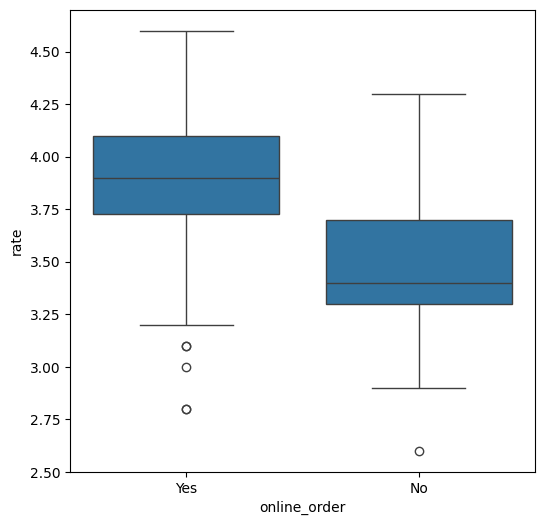

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y= "rate", data = df)

Conlusion: Offline get lower rating in comparision to online

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(50.722222222222214, 0.5, 'listed_in(type)')

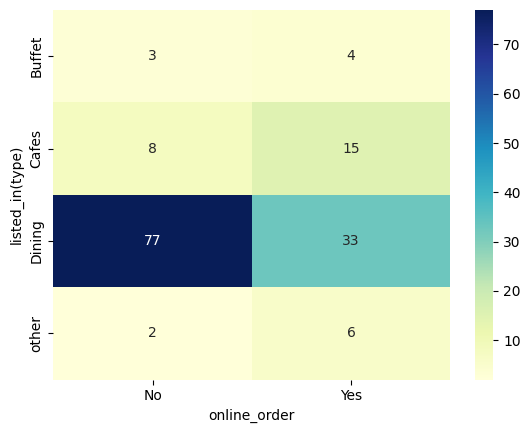

In [26]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('online_order')
plt.ylabel('listed_in(type)')

Conclusion: Dinning receive more offline order